In [54]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [55]:
pose_csv = '/Users/Shared/K/KayCei/HDC/AH4-KO/121423-BRIGHT FIELD/2023-12-14_16-30-54DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(216177, 12)


In [56]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
/Users/Shared/K/KayCei/HDC/AH4-KO/121423-BRIGHT FIELD


### original data table

In [57]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               809.062622  102.196594   
3                                               804.075867  100.909637   
6                                               802.831848  101.436768   
9                                               797.694336  102.504967   
12                                              798.444763  100.582466   
15                                              805.494629   93.519981   
18                                              799.095947   98.910355   
21                                              795.556030  103.062248   
24                                              793.227844  105.228302   
27                                              792.466736  105.327850   
30                                              790.505676  104.945923   
33                                              791.092896  102.968323   
36                                              805.398621  100.954842   
39                                              837.636536   94.450386   
42                                             1100.471313   55.642654   
45                                             1100.522949   56.013977   
48                                             1100.229858   56.521797   
51                                              841.581665  133.224594   
54                                              839.925232  133.244797   
57                                             1099.462158   58.406818   
60                                             1100.272095   58.104595   
63                                             1100.536377   55.381844   
66                                             1100.037476   56.364967   
69                                             1100.511475   55.973068   
72                                             1100.613037   56.726540   
75                                              926.885925   31.970936   
78                                              837.798462  163.036438   
81                                              825.569153  180.299225   
84                                              820.507324  200.068100   
87                                              816.666748  221.048904   
90                                              812.469788  234.547104   
93                                              796.044189  256.148132   
96                                              772.857117  281.650970   
99                                              760.757263  299.699219   
102                                             764.734924  320.380615   
105                                             782.581238  333.118134   
108                                             798.874451  351.824371   
111                                             806.285400  370.469299   
114                                             813.271790  379.024139   
117                                             810.366882  390.820679   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           1.000000    934.271301   62.552570   0.999457   853.347046   
3           1.000000    917.252747   92.968185   0.972135   853.775574   
6           1.000000    918.997925   97.227814   0.999271   856.689392   
9           1.000000    913.183167   99.328194   0.999811   859.603699   
12          1.000000    881.722656   97.225037   0.999994   861.962097   
15          1.000000    869.727783   98.336845   0.999999   861.719055   
18          1.000000    863.752808   99.503029   0.999999   859.612427   
21          1.000000    858.341492  100.357491   0.999999   858.779663   
24 

### after removing likelihood and headers

In [58]:
pose[:5, :]

array([[ 809.06262207,  102.19659424,  934.27130127,   62.55257034,
         853.3470459 ,   84.86210632, 1107.33898926,   53.72131348,
         874.78009033,   49.01230621,  905.02203369,   37.80244064],
       [ 807.47088623,  101.46378326,  931.10180664,   62.60391235,
         853.1340332 ,   83.84136963, 1107.44567871,   53.94062042,
         873.32128906,   49.2658844 ,  901.98565674,   36.69934082],
       [ 805.5737915 ,  101.12302399,  935.859375  ,   69.68141174,
         852.28894043,   83.21183014, 1107.3380127 ,   52.93392563,
         874.27185059,   49.65447235,  904.2444458 ,   36.95770645],
       [ 804.0758667 ,  100.90963745,  917.25274658,   92.96818542,
         853.77557373,   82.65647888, 1107.55639648,   52.32366943,
         874.52319336,   50.0721817 ,  904.91229248,   37.10965347],
       [ 803.24902344,  101.00558472,  918.96026611,   93.39095306,
         855.40026855,   81.48860168, 1107.08325195,   53.11089706,
         874.96942139,   50.1114769 ,  909.8

### plot

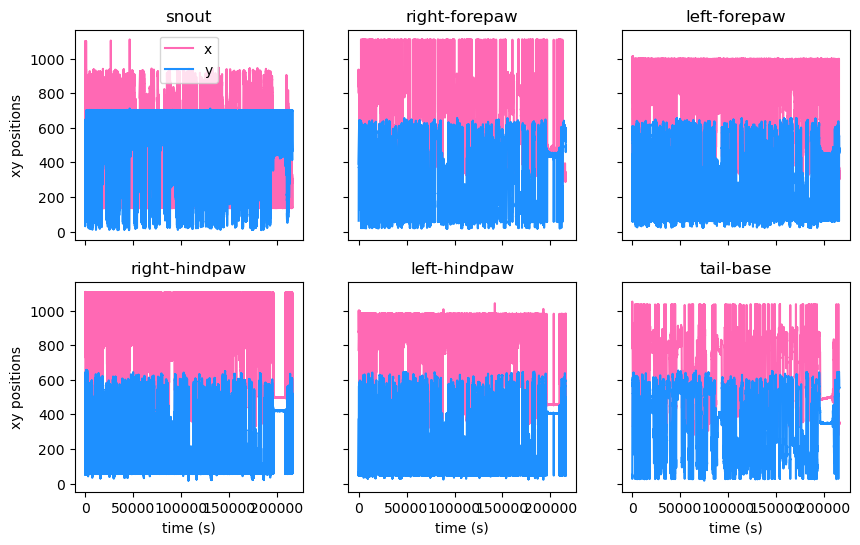

In [59]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [60]:
np.save('../processed_data/pose_video_exp_16.npy', pose)